<a href="https://colab.research.google.com/github/SaNadira/MNIST_Anamoly-detection/blob/main/MNIST_anamoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANOMOLY DETECTION USING UNSUPERVISED METHODS-UNLABLED DATA**

MNIST DATASET

Almost 7000 samples containing 0 and 60 other numbers as anomoly.

anomaly_indexes = [81, 143, 223, 329, 352, 401, 663, 701, 712, 790, 863, 2597, 2609, 2658, 2704, 2726, 2765, 2781, 3093,3203, 3295, 6065, 6229, 6235, 6535, 6857]

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from matplotlib.colors import LogNorm
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

In [ ]:
X = pd.read_csv('/content/mnist_with_anomalies.csv', delimiter=',')
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Load Dataset

**preprocessing**

*   Standardization





In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

n =  2
elements detected by the model as anomolies:
 [   4    5   17   26   59   80   99  127  143  148  192  211  223  229
  230  235  254  259  260  262  271  274  280  290  306  308  322  329
  330  332  336  343  349  351  352  363  383  403  435  445  450  453
  465  478  515  539  541  548  552  573  583  586  589  592  593  597
  603  636  638  641  644  646  652  656  663  685  689  701  712  719
  736  738  741  771  775  785  790  809  818  836  837  859  863  871
  876  888  889  901  945  953  978  992 1000 1002 1010 1014 1018 1023
 1029 1034 1039 1040 1047 1049 1063 1083 1090 1093 1106 1110 1120 1122
 1138 1143 1145 1146 1162 1165 1169 1178 1210 1212 1228 1233 1237 1239
 1254 1260 1293 1299 1324 1328 1333 1343 1365 1367 1378 1384 1393 1399
 1409 1417 1421 1423 1425 1430 1435 1438 1442 1465 1472 1478 1479 1482
 1498 1501 1504 1505 1506 1526 1545 1563 1570 1582 1604 1637 1679 1688
 1721 1728 1744 1759 1761 1773 1781 1785 1797 1804 1834 1840 1847 1874
 1915 1922 1928 1939 194

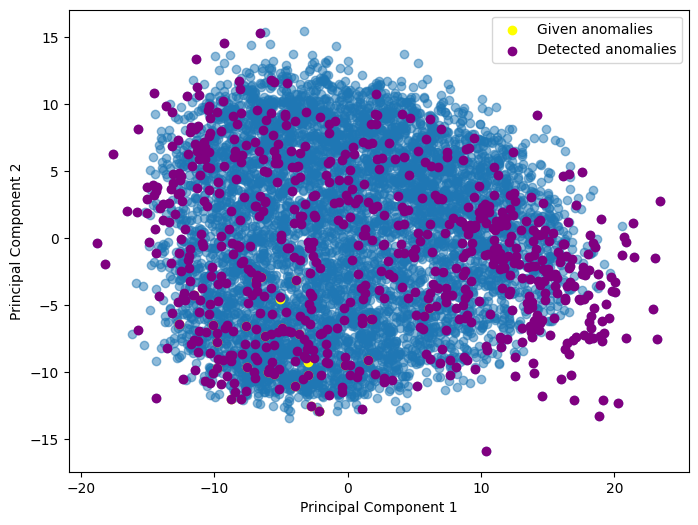

n =  50
elements detected by the model as anomolies:
 [   4    5   17   26   37   59   80   81   99  127  143  148  173  192
  211  223  230  235  254  259  260  262  271  280  285  290  306  322
  329  330  332  336  343  349  351  352  363  403  411  435  445  450
  453  465  478  515  539  552  556  573  583  586  589  592  593  597
  636  641  644  646  656  663  689  701  712  736  738  741  771  775
  781  785  790  809  818  836  837  859  863  865  870  871  875  876
  888  889  901  916  945  953  978  992 1000 1010 1014 1018 1025 1026
 1029 1034 1045 1047 1049 1063 1069 1076 1083 1090 1093 1110 1122 1138
 1143 1145 1146 1162 1165 1169 1178 1181 1210 1212 1233 1237 1239 1254
 1260 1293 1328 1333 1343 1365 1367 1369 1372 1378 1384 1393 1399 1417
 1421 1423 1430 1435 1438 1442 1465 1472 1478 1479 1482 1488 1494 1498
 1501 1504 1506 1545 1563 1570 1582 1601 1666 1668 1678 1679 1721 1728
 1744 1759 1773 1781 1785 1797 1804 1821 1840 1874 1900 1922 1928 1939
 1948 1954 1964 1971 19

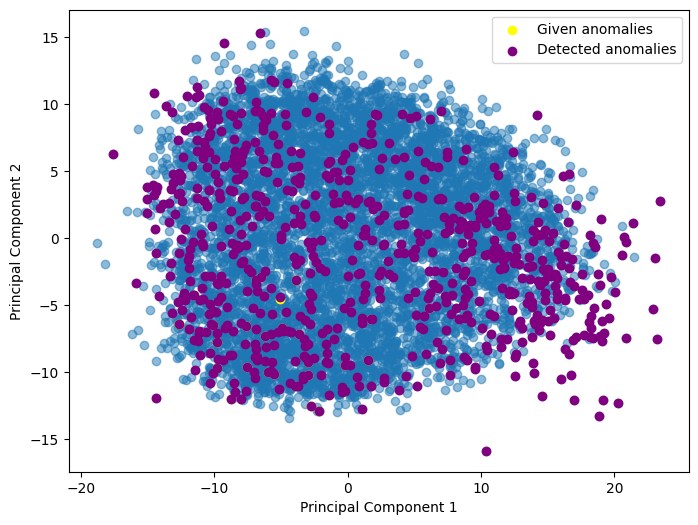

n =  100
elements detected by the model as anomolies:
 [   4    5   17   26   37   59   80   81   99  131  143  173  192  210
  211  223  229  230  235  254  259  260  262  271  280  286  288  290
  306  308  322  329  332  336  343  349  351  352  374  381  403  411
  445  450  453  465  478  479  515  521  539  548  552  556  568  573
  583  586  587  589  592  593  597  636  638  641  644  646  656  663
  678  685  689  701  712  717  736  738  741  771  781  785  790  809
  818  836  837  859  863  870  871  876  888  889  893  894  901  945
  953  978  992  998 1000 1002 1014 1018 1025 1026 1029 1045 1047 1049
 1063 1083 1090 1093 1106 1110 1138 1143 1145 1146 1162 1169 1178 1181
 1210 1212 1233 1237 1239 1254 1293 1299 1328 1333 1343 1365 1367 1369
 1372 1378 1393 1399 1409 1417 1421 1423 1427 1430 1435 1442 1465 1472
 1475 1478 1479 1482 1494 1498 1501 1504 1505 1506 1526 1531 1545 1563
 1570 1582 1601 1666 1668 1679 1721 1728 1744 1759 1773 1785 1797 1804
 1821 1836 1840 1874 1

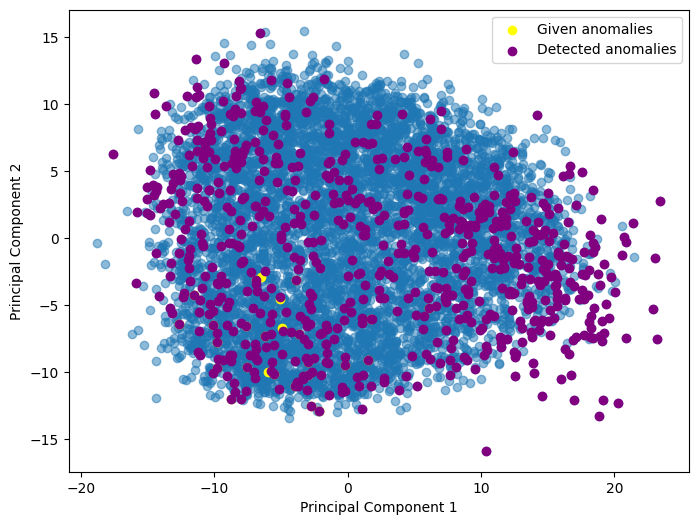

n =  1
elements detected by the model as anomolies:
 [   4    5   17   59   80   99  127  143  148  192  211  223  229  230
  235  254  259  260  262  271  274  280  285  290  306  308  322  329
  330  332  343  349  351  352  363  372  383  403  435  445  450  453
  465  478  515  539  541  548  552  573  583  586  589  592  593  597
  603  636  638  641  644  646  652  656  663  685  689  701  712  719
  736  738  741  771  775  785  790  794  809  818  836  837  859  863
  871  875  876  888  889  901  945  946  953  978  992 1000 1002 1010
 1014 1018 1029 1034 1039 1040 1047 1049 1063 1072 1083 1090 1093 1106
 1110 1120 1122 1138 1143 1145 1146 1162 1169 1178 1181 1212 1228 1233
 1237 1239 1254 1260 1293 1299 1324 1328 1333 1343 1365 1367 1378 1384
 1393 1399 1409 1417 1421 1423 1425 1430 1438 1442 1465 1472 1478 1479
 1482 1498 1501 1504 1505 1506 1526 1545 1563 1570 1582 1601 1604 1637
 1666 1678 1679 1721 1728 1744 1759 1761 1773 1781 1785 1797 1804 1834
 1840 1847 1874 1915 192

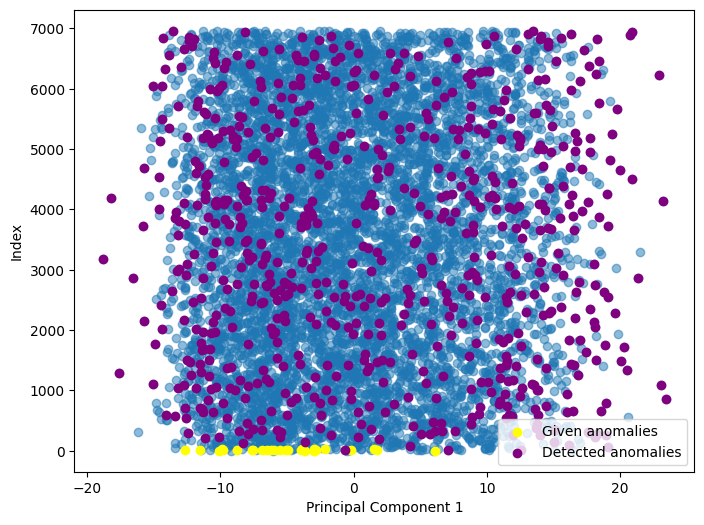

n =  0.95
elements detected by the model as anomolies:
 [   4    5   12   17   31   59   80   81   99  131  134  135  143  148
  211  214  223  224  229  230  254  259  260  262  271  288  290  308
  322  343  349  352  374  381  403  411  445  450  453  465  478  479
  522  539  548  552  556  568  573  586  589  592  597  600  603  627
  636  638  640  641  646  652  656  662  663  664  678  701  702  712
  717  736  738  741  766  771  781  782  785  790  809  812  836  837
  859  863  870  871  876  893  894  901  923  945  946  953  992  995
  998 1000 1002 1018 1023 1026 1045 1047 1054 1063 1075 1083 1090 1093
 1138 1143 1145 1146 1162 1169 1178 1181 1210 1212 1233 1237 1239 1254
 1293 1333 1343 1351 1369 1372 1378 1385 1393 1399 1409 1417 1427 1430
 1435 1442 1465 1475 1479 1482 1498 1501 1504 1505 1526 1531 1545 1563
 1570 1601 1623 1637 1660 1666 1668 1679 1680 1706 1721 1744 1759 1773
 1785 1787 1797 1821 1834 1840 1875 1909 1922 1928 1938 1948 1954 1964
 2040 2049 2054 2057 

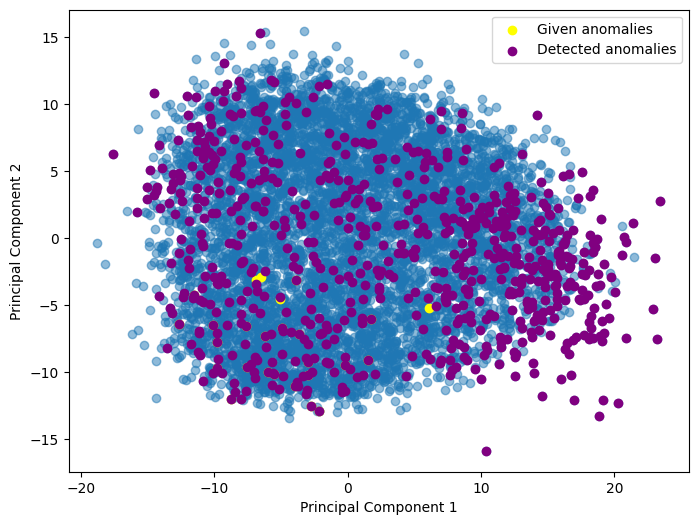

In [ ]:
#indices given as anomalies
anomaly_indexes = [81, 143, 223, 329, 352, 401, 663, 701, 712, 790, 863, 2597, 2609, 2658, 2704, 2726, 2765, 2781, 3093,3203, 3295, 6065, 6229, 6235, 6535, 6857]

#choose best n for components
n = [2, 50, 100, 1, 0.95]
for i in n:
  pca = PCA(n_components=i)
  X_pca = pca.fit_transform(X)
  #reconstructs the images
  X_pca_reverse = pca.inverse_transform(X_pca)
  #calculates the difference between the real ones and reversed ones.
  reconstruction_error = np.mean((X - X_pca_reverse) ** 2, axis=1)
  #it gathers the top 10%
  threshold = np.percentile(reconstruction_error, 90)
  anomalies = reconstruction_error > threshold
  anomaly_indices = np.where(anomalies)[0]
  common_elements = list(set(anomaly_indexes).intersection(anomaly_indices))
  print('n = ', i)
  print("elements detected by the model as anomolies:\n", anomaly_indices)
  print("number of detected elements: ", len(anomaly_indices))
  print('common elements with given incexes:\n', common_elements)
  print("number of common elements : ", len(common_elements))
  plt.figure(figsize=(8, 6))

  # Check if X_pca has more than one column before plotting
  if X_pca.shape[1] > 1:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5) # Plot all points first
    plt.scatter(X_pca[anomaly_indexes, 0], X_pca[anomaly_indexes, 1], color='yellow', label='Given anomalies') # Highlight given anomalies
    plt.scatter(X_pca[anomaly_indices, 0], X_pca[anomaly_indices, 1], color='purple', label='Detected anomalies') # Highlight detected anomalies
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()
  else:
    # If only one component, plot against a range of values
    plt.scatter(X_pca[:, 0], range(len(X_pca)), alpha=0.5)
    plt.scatter(X_pca[anomaly_indexes, 0], range(len(anomaly_indexes)), color='yellow', label='Given anomalies') # Highlight given anomalies
    plt.scatter(X_pca[anomaly_indices, 0], [i for i in anomaly_indices], color='purple', label='Detected anomalies') # Highlight detected anomalies
    plt.xlabel('Principal Component 1')
    plt.ylabel('Index')
    plt.legend()
    plt.show()




#GMM

**Finding Anomalies**
To determine whether a data point is an anomaly we need to compute the log-likelihood of the given data.

We use the "score_samples" method to compute the log-likelihood of each sample in X.
Then, compare the likelihood values with the density threshold.

Setting the Threshold
For this problem, the threshold is at the fourth percentile lowest density.

For defining the threshold, we use the numpy.percentile()function. It computes the nth percentile of the given data (array elements) along the specified axis.

For further detail: https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

In [ ]:
# Given anomaly indices
anomaly_indexes = [81, 143, 223, 329, 352, 401, 663, 701, 712, 790, 863, 2597, 2609, 2658, 2704, 2726, 2765, 2781, 3093, 3203, 3295, 6065, 6229, 6235, 6535, 6857]

# Determine n_components range dynamically based on dataset size
n_samples = X.shape[0]

n_components_list = list(range(1, 11))

# Track metrics for each n_component
results = []

for i in n_components_list:
    gmm = GaussianMixture(n_components=i, n_init=10, random_state=0)
    gmm.fit(X)
    densities = gmm.score_samples(X)
    density_threshold = np.percentile(densities, 10)  # Assume 1% are anomalies
    anomalies = densities < density_threshold
    anomaly_indices = np.where(anomalies)[0]
    common_elements = list(set(anomaly_indexes).intersection(anomaly_indices))

    # Calculate precision, recall, F1
    tp = len(common_elements)
    fp = len(anomaly_indices) - tp
    fn = len(anomaly_indexes) - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / len(anomaly_indexes) if len(anomaly_indexes) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    results.append({
        'n': i,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'anomaly_indices': anomaly_indices,
        'common_elements': common_elements
    })

# Select best n_component based on highest F1-score
best_result = max(results, key=lambda x: x['f1'])
best_n = best_result['n']
best_anomaly_indices = best_result['anomaly_indices']
best_common = best_result['common_elements']

# Plot F1 scores across n_components
plt.figure(figsize=(10, 4))
plt.plot([res['n'] for res in results], [res['f1'] for res in results], marker='o')
plt.scatter(best_n, best_result['f1'], color='red', label=f'Best n={best_n}')
plt.xlabel('n_components')
plt.ylabel('F1-score')
plt.title('F1-score vs. n_components')
plt.legend()
plt.grid(True)
plt.show()

# Plot anomalies for the best model
plt.figure(figsize=(10, 6))
if X_pca.shape[1] > 1:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, label='Normal')
    plt.scatter(X_pca[anomaly_indexes, 0], X_pca[anomaly_indexes, 1],
                color='yellow', s=100, edgecolor='black', label='Given Anomalies')
    plt.scatter(X_pca[best_anomaly_indices, 0], X_pca[best_anomaly_indices, 1],
                color='purple', s=50, edgecolor='black', label='Detected Anomalies')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
else:
    plt.scatter(X_pca[:, 0], range(len(X_pca)), alpha=0.5, label='Normal')
    plt.scatter(X_pca[anomaly_indexes, 0], anomaly_indexes,
                color='yellow', s=100, edgecolor='black', label='Given Anomalies')
    plt.scatter(X_pca[best_anomaly_indices, 0], best_anomaly_indices,
                color='purple', s=50, edgecolor='black', label='Detected Anomalies')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Index')

plt.title(f'Best Model (n_components={best_n})\nCommon Anomalies: {len(best_common)}')
plt.legend()
plt.show()

**Autoencoder**

In [ ]:
# prompt: use pytorch

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Hyperparameters
input_dim = X.shape[1]
encoding_dim = 32 # Adjust as needed
learning_rate = 0.001
epochs = 50
batch_size = 64


# Create the autoencoder, loss function, and optimizer
model = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Create data loader
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(epochs):
  for data in dataloader:
    inputs = data[0]
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()
  print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Inference and anomaly detection
with torch.no_grad():
  reconstructions = model(X_tensor)
  reconstruction_errors = torch.mean((X_tensor - reconstructions) ** 2, dim=1).numpy()
  threshold = np.percentile(reconstruction_errors, 99) # Adjust threshold as needed
  anomalies_autoencoder = np.where(reconstruction_errors > threshold)[0]

# Compare with provided anomaly indices
common_autoencoder = list(set(anomaly_indexes).intersection(anomalies_autoencoder))

print("Autoencoder detected anomalies:", anomalies_autoencoder)
print("Number of autoencoder anomalies:", len(anomalies_autoencoder))
print("Common elements with provided anomalies:", common_autoencoder)
print("Number of common elements:", len(common_autoencoder))

# Plotting (similar to the PCA plots in the original code)
#... add plotting code for the autoencoder results
